         53 function calls in 1.203 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    1.207    0.604 C:\Users\Gasper\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3469(run_code)
        2    0.000    0.000    1.207    0.604 {built-in method builtins.exec}
        1    0.000    0.000    1.203    1.203 C:\Users\Gasper\AppData\Local\Temp\ipykernel_224\3309896240.py:1(<module>)
        1    0.000    0.000    1.203    1.203 C:\Users\Gasper\AppData\Local\Temp\ipykernel_224\3309896240.py:18(main)
        7    1.203    0.172    1.203    0.172 {built-in method time.sleep}
        5    0.000    0.000    0.502    0.100 C:\Users\Gasper\AppData\Local\Temp\ipykernel_224\3309896240.py:15(task_3)
        1    0.000    0.000    0.500    0.500 C:\Users\Gasper\AppData\Local\Temp\ipykernel_224\3309896240.py:9(task_1)
        1    0.000    0.000    0.200    0.200 C:\Users\Gasper\A

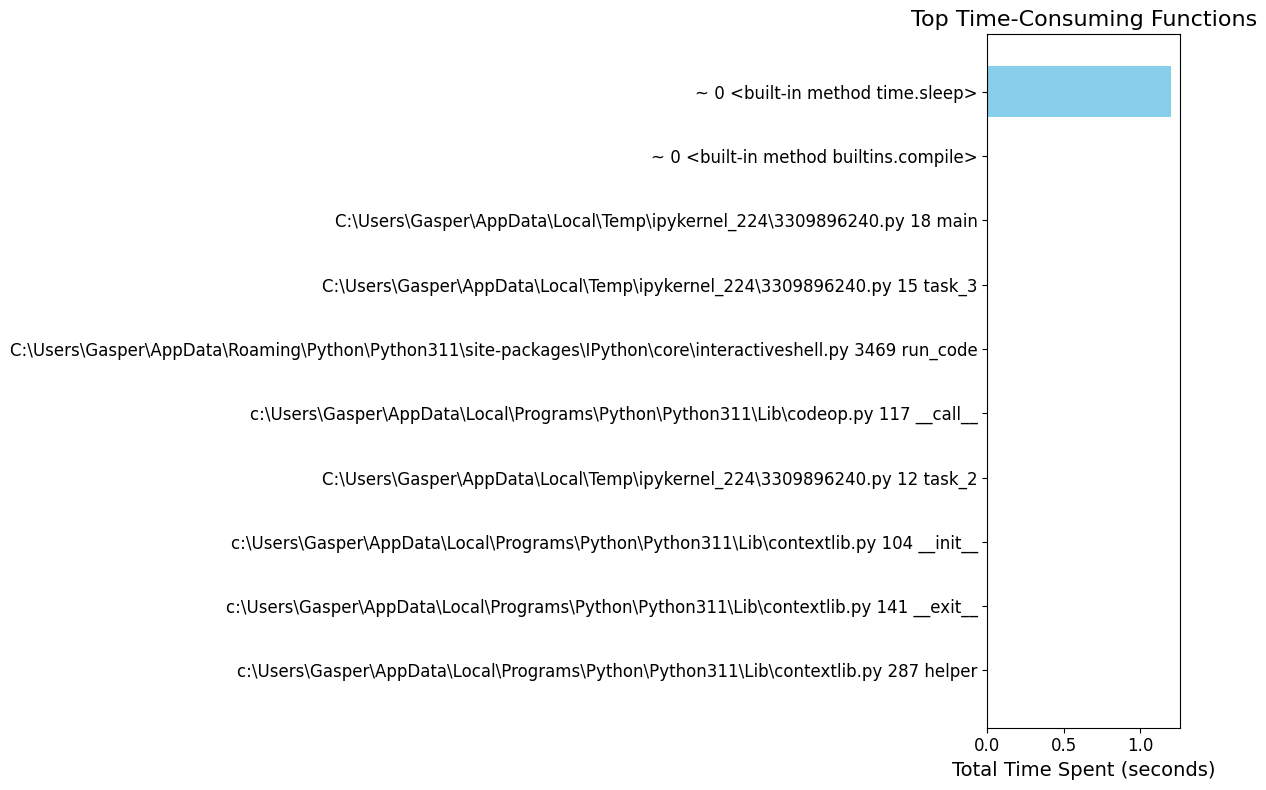

In [1]:
import cProfile
import pstats
import io
import matplotlib.pyplot as plt
import numpy as np
import time

# Dummy functions to simulate different tasks
def task_1():
    time.sleep(0.5)

def task_2():
    time.sleep(0.2)

def task_3():
    time.sleep(0.1)

def main():
    task_1()
    task_2()
    for _ in range(5):
        task_3()

# Profiling the main function
profile = cProfile.Profile()
profile.enable()

main()

profile.disable()
s = io.StringIO()
sortby = 'cumulative'
ps = pstats.Stats(profile, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

# Parsing the profiling data
profile_stats = ps.stats
function_names = []
total_times = []

for func in profile_stats.keys():
    func_name = ' '.join([str(f) for f in func])
    total_time = profile_stats[func][2]
    function_names.append(func_name)
    total_times.append(total_time)

# Sorting and selecting the top N functions
N = 10  # Adjust N to display the top N time-consuming functions
sorted_indices = np.argsort(total_times)[::-1][:N]
sorted_function_names = [function_names[i] for i in sorted_indices]
sorted_total_times = [total_times[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(12, 8))  # Adjust for better fit
plt.barh(sorted_function_names, sorted_total_times, color='skyblue')
plt.xlabel('Total Time Spent (seconds)', fontsize=14)
plt.title('Top Time-Consuming Functions', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # to display the longest bars at the top
plt.tight_layout()  # Adjusts subplot params for better fit
plt.show()
